## Import modules

In [1]:
#Data manipulation
import pandas as pd
import numpy as np
import re
import random

#Data visualization
import matplotlib.pyplot as plt
import plotly.express as px
#import seaborn as sns

#from jupyter_dash import JupyterDash # Having interractive dash dashborads inside notebook without all the hassle of converting my notebook into a .py script!
#from dash import dcc, html, Dash
#from dash.dependencies import Input, Output

import folium #Map
#import ipywidgets as widgets
import streamlit as st #Web app
#from streamlit_jupyter import StreamlitPatcher, tqdm

#Configuration
import warnings
warnings.filterwarnings("ignore")

#Kaggle
import kaggle_data_download as kdd

#Path
import os
os.chdir('C:/Users/User/Desktop/who-covid-spread')

pd.set_option('display.max_columns', None)

## Download Data from Kaggle

In [2]:
kdd.download_dataset(dataset_name='sudalairajkumar/novel-corona-virus-2019-dataset', download_path='Data')

Dataset URL: https://www.kaggle.com/datasets/sudalairajkumar/novel-corona-virus-2019-dataset
Dataset 'sudalairajkumar/novel-corona-virus-2019-dataset' downloaded and extracted to 'Data'


## Import data

In [3]:
main = pd.read_csv('Data/covid_19_data.csv')

confirmed = pd.read_csv('Data/time_series_covid_19_confirmed.csv')
recovered = pd.read_csv('Data/time_series_covid_19_recovered.csv')
deaths = pd.read_csv('Data/time_series_covid_19_deaths.csv')

us_confirmed = pd.read_csv('Data/time_series_covid_19_confirmed_US.csv')
us_deaths = pd.read_csv('Data/time_series_covid_19_deaths_US.csv')

In [4]:
main.head(2)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0


In [5]:
deaths.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0

In [6]:
us_deaths.head(2)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,8

In [7]:
print('Checking data, seems to be in long format (main) and in wide format (remaining).\n'\
    'I will first merge the wide format data and see if there is additional info compared to main.\n'\
    'An importnt note is that there is no Lat, Long in main but has Last Update column (which corresponds tho the recorded day of info).')

Checking data, seems to be in long format (main) and in wide format (remaining).
I will first merge the wide format data and see if there is additional info compared to main.
An importnt note is that there is no Lat, Long in main but has Last Update column (which corresponds tho the recorded day of info).


In [8]:
main_places = (main['Province/State'] + ':' + main['Country/Region']).unique()
data_places = (us_deaths['Province_State'] + ':' + us_deaths['Country_Region']).unique()
#data_places[~pd.Series(data_places).isin(main_places)]
print(main_places[~pd.Series(main_places).isin(data_places)][random.sample(range(len(main_places) - 100), 10)], '\n')
print('Also, seems that the places between main and wide format data are the same but with different names (e.g. FL vs Florida, CA vs California)\n',
      'This will introduce problems while merging the main with the wide in order to keep Lat and Long info\n')

['Manatee County, FL:US' 'Acre:Brazil' 'Kemerovo Oblast:Russia'
 'Macau:Macau' 'Sumy Oblast:Ukraine' 'Charlotte County, FL:US'
 'Diamond Princess cruise ship:Canada' 'Berkshire County, MA:US'
 'Pais Vasco:Spain' 'Altai Krai:Russia'] 

Also, seems that the places between main and wide format data are the same but with different names (e.g. FL vs Florida, CA vs California)
 This will introduce problems while merging the main with the wide in order to keep Lat and Long info



In [9]:
#Check overlapped columns for wide format data
all_cols = sorted(set(us_confirmed.columns).union(set(us_deaths.columns)).union(set(deaths.columns)).union(set(confirmed.columns)).union(set(recovered.columns)))

columns_df = pd.DataFrame({
    'all': all_cols,
    'confirmed': [col in confirmed.columns for col in all_cols],
    'deaths': [col in deaths.columns for col in all_cols],
    'recovered': [col in recovered.columns for col in all_cols],
    'us_confirmed': [col in us_confirmed.columns for col in all_cols],
    'us_deaths': [col in us_deaths.columns for col in all_cols],
})
columns_df[columns_df.iloc[:,1:].apply(lambda x: any(x != True), axis = 1)]

,all,confirmed,deaths,recovered,us_confirmed,us_deaths
494,Admin2,False,False,False,True,True
495,Combined_Key,False,False,False,True,True
496,Country/Region,True,True,True,False,False
497,Country_Region,False,False,False,True,True
498,FIPS,False,False,False,True,True
500,Long,True,True,True,False,False
501,Long_,False,False,False,True,True
502,Population,False,False,False,False,True
503,Province/State,True,True,True,False,False
504,Province_State,False,False,False,True,True


In [10]:
#Merge the wide format data
#Remove unnecessary columns
us_confirmed = us_confirmed.iloc[:,~us_confirmed.columns.isin(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Combined_Key'])]
us_deaths = us_deaths.iloc[:,~us_deaths.columns.isin(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Combined_Key', 'Population'])]

#Rename columns accordingly
cols = list(us_confirmed.columns)
cols[0:4] = list(confirmed.columns[0:4])
us_confirmed.columns = cols

cols = list(us_deaths.columns)
cols[0:4] = list(confirmed.columns[0:4])
us_deaths.columns = cols

In [11]:
# Merge the data by colnames
print(f'Wide format data have the same column names/order:\
      {list(recovered.columns) == list(confirmed.columns) == list(deaths.columns) == list(us_confirmed.columns) == list(us_deaths.columns)}\n')

confirmed['Status'], recovered['Status'], deaths['Status'], us_confirmed['Status'], us_deaths['Status'] = 'confirmed', 'recovered', 'recovered', 'death', 'death'
data = pd.concat([confirmed, recovered, deaths, us_confirmed, us_deaths], axis = 0)

print(f'US data from non-US and US files seems to differ: {len(data[data['Country/Region'] == 'US']['Province/State'].unique()) == len(us_confirmed['Province/State'].unique())}.\n'\
    'Data in US files are seperated by State. Data in non-US files are overall aggregated.\n'\
    'I will remove overall aggregated !\n')

print(f'Merged data: {data[data['Country/Region'] == 'US']['Province/State'].isna().sum()},  Unmerged data: {us_deaths[us_deaths['Country/Region'] == 'US']['Province/State'].isna().sum()}\n',
      'There are 3 rows with missing State for US country which equals the number of non-US data (confirmed, recovered, deaths).\n',
      'These rows will be removed !')
data = data[~((data['Country/Region'] == 'US') & (data['Province/State'].isna()))]

Wide format data have the same column names/order:      True

US data from non-US and US files seems to differ: False.
Data in US files are seperated by State. Data in non-US files are overall aggregated.
I will remove overall aggregated !

Merged data: 3,  Unmerged data: 0
 There are 3 rows with missing State for US country which equals the number of non-US data (confirmed, recovered, deaths).
 These rows will be removed !


In [12]:
# Reshape data to long format
datalong = data.melt(id_vars=['Province/State','Country/Region', 'Lat', 'Long', 'Status'],
          value_vars=list(data.columns[data.columns.str.contains('\d', regex=True)]),
          var_name='Date', value_name='Cases')
print(f'Data reffered to about {len((datalong.Lat + datalong.Long).unique())} Countries/States/Provinces. Seems reasonable value for the world data.\n')
print('Also, seems that the places between main and datalong are the same but with different names (e.g. FL vs Florida, CA vs California)')

Data reffered to about 3503 Countries/States/Provinces. Seems reasonable value for the world data.

Also, seems that the places between main and datalong are the same but with different names (e.g. FL vs Florida, CA vs California)


In [13]:
#How the info collected
datalong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3702036 entries, 0 to 3702035
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Province/State  object 
 1   Country/Region  object 
 2   Lat             float64
 3   Long            float64
 4   Status          object 
 5   Date            object 
 6   Cases           int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 197.7+ MB


In [14]:
datalong['Date'] = pd.to_datetime(datalong['Date'], format='%m/%d/%y', errors='coerce')
datalong.sort_values(by = ['Country/Region', 'Province/State', 'Date'], inplace=True)

datalong['Lat'] = datalong['Lat'].astype(str)
datalong['Long'] = datalong['Long'].astype(str)

datalong.head(3)

,Province/State,Country/Region,Lat,Long,Status,Date,Cases
0,NaN,Afghanistan,33.93911,67.709953,confirmed,2020-01-22,0
275,NaN,Afghanistan,33.93911,67.709953,recovered,2020-01-22,0
535,NaN,Afghanistan,33.93911,67.709953,recovered,2020-01-22,0


In [15]:
datalong.isna().sum()

Province/State    280592
Country/Region         0
Lat                    0
Long                   0
Status                 0
Date                   0
Cases                  0
dtype: int64

<Axes: xlabel='Country/Region,Date'>

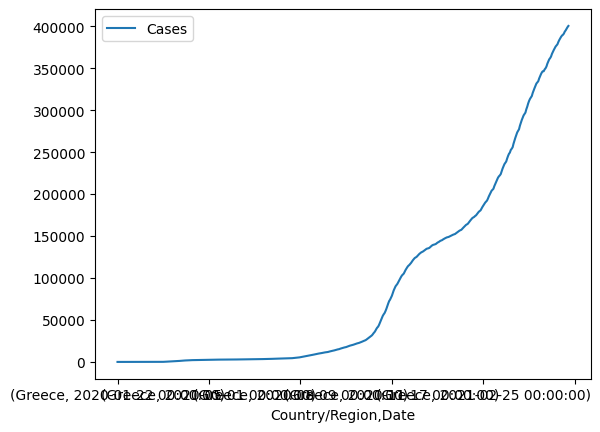

In [16]:
(datalong[(datalong['Status'] == 'confirmed') & (datalong['Country/Region'] == 'Greece')]
 .groupby(['Country/Region', 'Date'], as_index = True)
 .agg({'Cases': 'sum'})
 ).plot.line()

## Data cleaning

In [17]:
geo_df['Country/Region'] = geo_df['Country/Region'].replace({
    'Mainland China': 'China',
    'US': 'United States',
    'Korea, South': 'South Korea',
    'Taiwan': 'Taiwan',
    'Iran (Islamic Republic of)': 'Iran',
    'Russian Federation': 'Russia',
    'Czechia': 'Czech Republic',
    'Vietnam': 'Viet Nam'
})

geo_by_country = geo_df.groupby('Country/Region')[['Lat', 'Long']].mean().reset_index()

main_df['Country/Region'] = main_df['Country/Region'].replace({
    'Mainland China': 'China',
    'US': 'United States',
    'Korea, South': 'South Korea',
    'Taiwan': 'Taiwan',
    'Iran (Islamic Republic of)': 'Iran',
    'Russian Federation': 'Russia',
    'Czechia': 'Czech Republic',
    'Vietnam': 'Viet Nam'
})

main_df = main_df.merge(geo_by_country, on='Country/Region', how='left')

NameError: name 'geo_df' is not defined

In [ ]:
main_df = main_df.dropna(subset=['Lat'])

main_df['ObservationDate'] = pd.to_datetime(main_df['ObservationDate'])
main_df['Month'] = main_df['ObservationDate'].dt.month
main_df = main_df.sort_values(['Province/State', 'Country/Region', 'ObservationDate'], ascending=[False, False, True])

main_df.isna().sum()

SNo                    0
ObservationDate        0
Province/State     76921
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
Lat                    0
Long                   0
Month                  0
dtype: int64

In [ ]:
# Create a 'key' column by concatenating Country/Region and Province/State
main_df['key'] = main_df['Country/Region'].astype(str) + ' - ' + main_df['Province/State'].astype(str)

# For each key, calculate the daily difference for Confirmed, Deaths, and Recovered
# If a key has only one row, keep the original value (no diff possible)
def safe_diff(group, col):
    if len(group) == 1:
        return group[col]
    else:
        return group[col].diff().fillna(group[col])

main_df['Confirmed_diff'] = main_df.groupby('key', group_keys=False).apply(lambda g: safe_diff(g, 'Confirmed'))
main_df['Deaths_diff'] = main_df.groupby('key', group_keys=False).apply(lambda g: safe_diff(g, 'Deaths'))
if 'Recovered' in main_df.columns:
    main_df['Recovered_diff'] = main_df.groupby('key', group_keys=False).apply(lambda g: safe_diff(g, 'Recovered'))

In [ ]:
# Drop rows where the new diff columns have negative values
main_df = main_df[
    (main_df['Confirmed_diff'] >= 0) &
    (main_df['Deaths_diff'] >= 0) &
    (main_df['Recovered_diff'] >= 0)
]

## EDA

### Overall

In [ ]:
# --- Overall COVID-19 Metrics (using original columns, not _diff columns) ---

# Add death rate and recovery rate columns to the dataset (per row)
main_df['Death_Rate_orig'] = np.where(
    main_df['Confirmed'] > 0,
    (main_df['Deaths'] / main_df['Confirmed']) * 100,
    np.nan
)
main_df['Recovery_Rate_orig'] = np.where(
    main_df['Confirmed'] > 0,
    (main_df['Recovered'] / main_df['Confirmed']) * 100,
    np.nan
)

# Total confirmed cases (latest available, using original columns)
total_confirmed = main_df.groupby('Country/Region')['Confirmed'].max().sum()

# Total deaths (latest available, using original columns)
total_deaths = main_df.groupby('Country/Region')['Deaths'].max().sum()

# Total recovered (latest available, using original columns)
total_recovered = main_df.groupby('Country/Region')['Recovered'].max().sum()

# Recovery and death rates (as percentages, using original columns)
recovery_rate = (total_recovered / total_confirmed * 100) if total_confirmed > 0 else None
death_rate = (total_deaths / total_confirmed * 100) if total_confirmed > 0 else None

# Number of unique countries/regions
num_countries = main_df['Country/Region'].nunique()

# Number of unique provinces/states
num_provinces = main_df['Province/State'].nunique()

# Print metrics
print("COVID-19 Overall Metrics (using original columns)")
print(f"Total Confirmed Cases: {total_confirmed:,}")
print(f"Total Deaths: {total_deaths:,}")
print(f"Total Recovered: {total_recovered:,}")
if recovery_rate is not None:
    print(f"Recovery Rate: {recovery_rate:.2f}%")
if death_rate is not None:
    print(f"Death Rate: {death_rate:.2f}%")
print(f"Number of Countries/Regions: {num_countries}")
print(f"Number of Provinces/States: {num_provinces}")
print(f"Date Range: {main_df['ObservationDate'].min()} to {main_df['ObservationDate'].max()}")

# Optional: Show the latest date's summary using original columns
latest_date = main_df['ObservationDate'].max()
latest_df = main_df[main_df['ObservationDate'] == latest_date]
latest_confirmed = latest_df['Confirmed'].sum()
latest_deaths = latest_df['Deaths'].sum()
latest_recovered = latest_df['Recovered'].sum()
latest_recovery_rate = (latest_recovered / latest_confirmed * 100) if latest_confirmed > 0 else None
latest_death_rate = (latest_deaths / latest_confirmed * 100) if latest_confirmed > 0 else None

print("\nLatest Date Summary (using original columns)")
print(f"Confirmed: {latest_confirmed:,}")
print(f"Deaths: {latest_deaths:,}")
print(f"Recovered: {latest_recovered:,}")
if latest_recovery_rate is not None:
    print(f"Recovery Rate: {latest_recovery_rate:.2f}%")
if latest_death_rate is not None:
    print(f"Death Rate: {latest_death_rate:.2f}%")

COVID-19 Overall Metrics (using original columns)
Total Confirmed Cases: 74,864,527.0
Total Deaths: 1,559,975.0
Total Recovered: 65,540,617.0
Recovery Rate: 87.55%
Death Rate: 2.08%
Number of Countries/Regions: 190
Number of Provinces/States: 714
Date Range: 2020-01-22 00:00:00 to 2021-05-29 00:00:00

Latest Date Summary (using original columns)
Confirmed: 165,005,621.0
Deaths: 3,389,830.0
Recovered: 106,818,583.0
Recovery Rate: 64.74%
Death Rate: 2.05%


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Use _diff columns for daily new cases
daily_diff = main_df.groupby('ObservationDate')[['Confirmed_diff', 'Deaths_diff', 'Recovered_diff']].sum()

fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.1
)

fig.add_trace(go.Scatter(
    x=daily_diff.index,
    y=daily_diff['Confirmed_diff'],
    name='Confirmed',
    line=dict(color='blue', width=2)
), row=1, col=1)

if 'Recovered_diff' in daily_diff.columns:
    fig.add_trace(go.Scatter(
        x=daily_diff.index,
        y=daily_diff['Recovered_diff'],
        name='Recovered',
        line=dict(color='green', width=2)
    ), row=1, col=1)

fig.add_trace(go.Scatter(
    x=daily_diff.index,
    y=daily_diff['Deaths_diff'],
    name='Deaths',
    line=dict(color='red', width=2)
), row=1, col=1)

# Only one death label in the second subplot
fig.add_trace(go.Scatter(
    x=daily_diff.index,
    y=daily_diff['Deaths_diff'],
    name='Deaths',
    line=dict(color='red', width=2, dash='dot')
), row=2, col=1)

fig.update_layout(
    height=750,
    title="📊 COVID-19 Daily New Trends: Confirmed, Recovered & Deaths",
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=True,
    legend=dict(x=0.01, y=1)
)

fig.update_yaxes(showgrid=True, gridcolor='black', gridwidth=1, griddash='dash', row=1, col=1)
fig.update_yaxes(showgrid=True, gridcolor='black', gridwidth=1, griddash='dash', row=2, col=1)

fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="Number of Cases", row=1, col=1)
fig.update_yaxes(title_text="Number of Deaths", row=2, col=1)

fig.show()

In [ ]:
import plotly.graph_objects as go

# Calculate totals by country using _diff columns
country_stats = main_df.groupby('Country/Region').agg({
    'Confirmed_diff': 'sum',
    'Deaths_diff': 'sum',
    'Recovered_diff': 'sum' if 'Recovered_diff' in main_df.columns else 'min'
}).reset_index()

# Prepare data for filtering and sorting
metrics = {
    'Confirmed': {
        'col': 'Confirmed_diff',
        'color': 'royalblue'
    },
    'Deaths': {
        'col': 'Deaths_diff',
        'color': 'crimson'
    }
}
if 'Recovered_diff' in country_stats.columns:
    metrics['Recovered'] = {
        'col': 'Recovered_diff',
        'color': 'seagreen'
    }

# Create traces for each metric, sorted accordingly
traces = []
sorted_countries = {}
for metric, data in metrics.items():
    sorted_df = country_stats.sort_values(data['col'], ascending=True).tail(10)
    sorted_countries[metric] = sorted_df['Country/Region']
    traces.append(go.Bar(
        name=metric,
        y=sorted_df['Country/Region'],
        x=sorted_df[data['col']],
        marker_color=data['color'],
        orientation='h',
        visible=False,
        text=sorted_df[data['col']],
        textposition='inside'
    ))
# Set the first metric visible by default
traces[0].visible = True

fig = go.Figure(traces)

# Add buttons for filtering and sorting
buttons = []
for i, metric in enumerate(metrics.keys()):
    # Only the selected metric is visible
    visibility = [False] * len(metrics)
    visibility[i] = True
    # Update y and x for the selected metric (sorted)
    sorted_df = country_stats.sort_values(metrics[metric]['col'], ascending=True).tail(10)
    buttons.append(dict(
        label=metric,
        method='update',
        args=[
            {'visible': visibility,
             'y': [sorted_df['Country/Region'] if j == i else traces[j].y for j in range(len(metrics))],
             'x': [sorted_df[metrics[metric]['col']] if j == i else traces[j].x for j in range(len(metrics))],
             'text': [sorted_df[metrics[metric]['col']] if j == i else traces[j].text for j in range(len(metrics))]
            },
            {'title': f"Top 10 Countries by {metric}"}
        ]
    ))

fig.update_layout(
    updatemenus=[dict(
        type="buttons",
        direction="right",
        active=0,
        buttons=buttons,
        x=0.5,
        xanchor="center",
        y=1.1,
        yanchor="top"
    )],
    barmode='stack',
    title='Top 10 Countries by Confirmed',
    yaxis_title='Country/Region',
    xaxis_title='Count',
    legend_title='Metric'
)

fig.show()

In [ ]:
# Show how mean recovery rates change over time for the top 5 countries by total confirmed cases (using Plotly)
import plotly.graph_objects as go

main_df['YearMonth'] = main_df['ObservationDate'].dt.to_period('M')

# Calculate recovery rate using original columns (not _diff)
main_df['Recovery_Rate_orig'] = np.where(
    (main_df['Confirmed'] > 0) & (main_df['Recovered'].notna()),
    (main_df['Recovered'] / main_df['Confirmed']) * 100,
    np.nan
)

# Get top 5 countries by total confirmed cases (using _diff for fairness)
top5_countries = (
    main_df.groupby('Country/Region')['Confirmed_diff']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
    .tolist()
)

# Always include United States, even if not in top 5
if 'United States' not in top5_countries and 'United States' in main_df['Country/Region'].unique():
    top5_countries.append('United States')

# Remove duplicates (if US is already in top5)
top5_countries = list(dict.fromkeys(top5_countries))

# Filter data for these countries
top5_df = main_df[main_df['Country/Region'].isin(top5_countries)]

# Group by country and month, then calculate mean recovery rate (using original columns)
monthly_recovery = (
    top5_df.groupby(['Country/Region', 'YearMonth'])['Recovery_Rate_orig']
    .mean()
    .reset_index()
)

# Plot mean recovery rate using Plotly
fig = go.Figure()
for country in top5_countries:
    country_data = monthly_recovery[monthly_recovery['Country/Region'] == country]
    fig.add_trace(go.Scatter(
        x=country_data['YearMonth'].astype(str),
        y=country_data['Recovery_Rate_orig'],
        mode='lines+markers',
        name=f"{country} (mean)"
    ))

fig.update_layout(
    title='Mean Monthly Recovery Rate (Original) for Top 5 Countries by Confirmed Cases',
    xaxis_title='Month',
    yaxis_title='Mean Recovery Rate (%)',
    legend_title='Country',
    template='plotly_white',
    height=500,
    width=900
)
fig.show()

In [ ]:
# Show how mean death rates change over time for the top 5 countries by total confirmed cases (including USA)
import plotly.graph_objects as go

# Calculate death rate using original columns (not _diff)
main_df['Death_Rate_orig'] = np.where(
    (main_df['Confirmed'] > 0) & (main_df['Deaths'].notna()),
    (main_df['Deaths'] / main_df['Confirmed']) * 100,
    np.nan
)

# Get top 5 countries by total confirmed cases (using _diff for fairness)
top5_countries = (
    main_df.groupby('Country/Region')['Confirmed_diff']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
    .tolist()
)

# Always include United States, even if not in top 5
if 'United States' not in top5_countries and 'United States' in main_df['Country/Region'].unique():
    top5_countries.append('United States')

# Remove duplicates (if US is already in top5)
top5_countries = list(dict.fromkeys(top5_countries))

# Filter data for these countries
top5_df = main_df[main_df['Country/Region'].isin(top5_countries)]

# Group by country and month, then calculate mean death rate (using original columns)
monthly_death = (
    top5_df.groupby(['Country/Region', 'YearMonth'])['Death_Rate_orig']
    .mean()
    .reset_index()
)

# Plot mean death rate using Plotly
fig = go.Figure()
for country in top5_countries:
    country_data = monthly_death[monthly_death['Country/Region'] == country]
    fig.add_trace(go.Scatter(
        x=country_data['YearMonth'].astype(str),
        y=country_data['Death_Rate_orig'],
        mode='lines+markers',
        name=f"{country} (mean)"
    ))

fig.update_layout(
    title='Mean Monthly Death Rate (Original) for Top 5 Countries by Confirmed Cases',
    xaxis_title='Month',
    yaxis_title='Mean Death Rate (%)',
    legend_title='Country',
    template='plotly_white',
    height=500,
    width=900
)
fig.show()

In [ ]:
import folium
from ipywidgets import interact, widgets
import pandas as pd

# Prepare the country_map_df for each date
main_df['ObservationDate'] = pd.to_datetime(main_df['ObservationDate'])
date_options = main_df['ObservationDate'].dt.date.unique()
date_options = sorted(date_options)

def get_color(val, metric, df):
    from matplotlib import cm
    from matplotlib.colors import Normalize, to_hex
    if metric == 'Confirmed_diff':
        cmap = cm.get_cmap('YlOrRd')
    elif metric == 'Deaths_diff':
        cmap = cm.get_cmap('Reds')
    elif metric == 'Recovered_diff':
        cmap = cm.get_cmap('Greens')
    else:
        cmap = cm.get_cmap('YlOrRd')
    norm = Normalize(vmin=df[metric].min(), vmax=df[metric].max())
    return to_hex(cmap(norm(val)))

def get_radius(val, metric, df):
    vals = df[metric]
    min_cases = vals.min()
    max_cases = vals.max()
    return 4 + 26 * ((val - min_cases) / (max_cases - min_cases)) if max_cases > min_cases else 10

def plot_map(level='Confirmed', date=None):
    metric = {
        'Confirmed': 'Confirmed_diff',
        'Deaths': 'Deaths_diff',
        'Recovered': 'Recovered_diff'
    }[level]
    # Filter data for the selected date
    if date is not None:
        filtered = main_df[main_df['ObservationDate'].dt.date == pd.to_datetime(date).date()]
    else:
        filtered = main_df
    country_map_df = filtered.groupby('Country/Region').agg({
        'Confirmed_diff': 'sum',
        'Deaths_diff': 'sum',
        'Recovered_diff': 'sum' if 'Recovered_diff' in main_df.columns else 'min',
        'Lat': 'mean',
        'Long': 'mean'
    }).reset_index()
    m = folium.Map(location=[20, 0], zoom_start=2, tiles='CartoDB dark_matter')
    for _, row in country_map_df.iterrows():
        val = row[metric]
        if val > 0:
            folium.CircleMarker(
                location=[row['Lat'], row['Long']],
                radius=get_radius(val, metric, country_map_df),
                color=get_color(val, metric, country_map_df),
                fill=True,
                fill_color=get_color(val, metric, country_map_df),
                fill_opacity=0.8,
                popup=folium.Popup(
                    f"{row['Country/Region']}<br>{level}: {int(val):,}", max_width=200
                )
            ).add_to(m)
    return m

# Interactive filter with date slicer
interact(
    plot_map,
    level=['Confirmed', 'Deaths', 'Recovered'],
    date=widgets.SelectionSlider(
        options=date_options,
        value=date_options[-1],
        description='Date',
        continuous_update=False
    )
)

interactive(children=(Dropdown(description='level', options=('Confirmed', 'Deaths', 'Recovered'), value='Confi…

<function __main__.plot_map(level='Confirmed', date=None)>